# **Program with basic explanation of tensorflow workflow - [purpose: To understand Tf Workflow]** - 1

In [122]:
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline
img_1 = Image(filename = r"C:/users/Akhil Sanker/Downloads/1.png", width = 600, height = 300)
img_2 = Image(filename = r"C:/users/Akhil Sanker/Downloads/2.png", width = 600, height = 300)

In [123]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
#eager execution :- runs and evaluates immediately , without forming grpahs

**PLACEHOLDERS**

tf.placeholder - similar to variables , can be fed into the runtime using feed_dict within session.run , no initial value needed

tf.variable - you can provide initial values while declaring it



**#Sample : 1**

In [124]:
x = tf.placeholder(tf.int32,shape=[3],name='x')
'''It is of type int32 with shape(3,1)i.e 1D vector with 3 elements and given the name
x, similarly another placeholder is created , namely y . We treat these as
similar to constants'''
y = tf.placeholder(tf.int32 , shape=[3],name='y')

In [125]:
'''we need to run the graph inorder to know ,what value (x,y) holds'''
sum_x = tf.reduce_sum(x,name='sum_x') #sum of elements within the palceholder
prod_y = tf.reduce_prod(y,name='prod_y') #product of elements within the ph

final_div = tf.div(sum_x,prod_y,name='final_div')#element wise division


final_mean = tf.reduce_mean([sum_x,prod_y],name='final_mean')#taking the mean of array of values

#STARTING THE SESSION

sess = tf.Session()
print("sum(x):", sess.run(sum_x,feed_dict={x:[100,200,300]}))
print("prod(y):", sess.run(prod_y,feed_dict={y:[1,2,3]}))
writer = tf.summary.FileWriter('./tensorflow_example',sess.graph)
writer.close()
sess.close()



sum(x): 600
prod(y): 6
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
tf.float32 has type DType, but expected one of: int, long, bool
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
tf.float32 has type DType, but expected one of: int, long, bool


Summary :- Begins with a session,end it out. Writer creates an event list and
logs em into the given directory. To run , pass em into sess.run() provided ,
we add in the feed_dict(dictionary of values that are needed)

**FETCHES & FEED DICTIONARY**


: we give fetches and feed_dict pass into every session.run command. fetches parameter indicate what it is we want to compute and the feed dictionary specifies the placeholder values for that computation

In [126]:
W = tf.constant([10,100],name='const_W')
'''placeholders, where values/shapes arent given, can hold any shape tensors'''
x = tf.placeholder(tf.int32,name='x')
b = tf.placeholder(tf.int32,name='b')
#Simple multiplication

Wx = tf.multiply(W,x,name='Wx')
y=tf.add(Wx,b,name='y')

The code simply represents a fetch , i.e node of the graph we want to compute.
feed_dict is used to pass the value for the placeholders.

In [127]:
with tf.Session() as sess:
    print("Inter Result : = ",sess.run(Wx,feed_dict={x:[3,33]}))
    print("Final Result : = ",sess.run(y,feed_dict={x:[5,50],b:[7,9]}))
    
writer = tf.summary.FileWriter('./fetchesAndFeed',sess.graph)
writer.close()

Inter Result : =  [  30 3300]
Final Result : =  [  57 5009]
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
tf.float32 has type DType, but expected one of: int, long, bool
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
tf.float32 has type DType, but expected one of: int, long, bool


**Variables**

:Values within a variable can be changed, its a mutable tensor.
In supervised learning ,  lets say regression here.
The values of a & b in the line keeps on changing as our aim is to get the minimum error,these intermediate results are
stored in variables

In [128]:
W = tf.Variable([2.5,4.0],tf.float32,name='var_W')
x = tf.placeholder(tf.float32, name='x')
b = tf.Variable([5.0,10.0],tf.float32, name='var_b')

y = W*x + b  #Typical Linear Regression


Now that we've initialized our variable , we need our graph to know that we've something as such declared.
For this purpose, we use tf.global_variable_initializer().

In [129]:
init  = tf.global_variables_initializer()

In [130]:
with tf.Session() as sess:
    sess.run(init)  #calling the initializer 
    print("final result : ",sess.run(y,feed_dict={x:[10,100]}))

final result :  [ 30. 410.]


In [131]:
#Now changing the values , we get:
number = tf.Variable(3)
multiplier = tf.Variable(2)

In [132]:
init = tf.global_variables_initializer()
result = number.assign(tf.multiply(number,multiplier))
with tf.Session() as sess:
    sess.run(init)
    for i in range(10):
        print("Result * multiplier : - ",sess.run(result))
        print("Increment Multiplier,new_value : - ",sess.run(multiplier.assign_add(1)))

Result * multiplier : -  6
Increment Multiplier,new_value : -  3
Result * multiplier : -  18
Increment Multiplier,new_value : -  4
Result * multiplier : -  72
Increment Multiplier,new_value : -  5
Result * multiplier : -  360
Increment Multiplier,new_value : -  6
Result * multiplier : -  2160
Increment Multiplier,new_value : -  7
Result * multiplier : -  15120
Increment Multiplier,new_value : -  8
Result * multiplier : -  120960
Increment Multiplier,new_value : -  9
Result * multiplier : -  1088640
Increment Multiplier,new_value : -  10
Result * multiplier : -  10886400
Increment Multiplier,new_value : -  11
Result * multiplier : -  119750400
Increment Multiplier,new_value : -  12


The Above code shows , varying nature of a variable. Like any use-case , This is something of a common nature to a variable

**Mutiple Graphs for a Tf Program**:

We can explicitly create as many graphs inside a TensorFlow program. Any TensorFlow program have a default graph which contains all the placeholders and variables you have instantiated. But we can logically segment the graph by instantiating a graph explicitly using tf.graph() .

In [133]:
g1 = tf.Graph()
'''We need to set g1 to **default** to add tensors to the graph'''

'We need to set g1 to **default** to add tensors to the graph'

In [134]:
with g1.as_default():
    with tf.Session() as sess:
        A = tf.constant([5,7],tf.int32,name='A')
        x = tf.placeholder(tf.int32,name='x')
        b = tf.constant([3,4],tf.int32,name='b')
        y = A*x+b
        print(sess.run(y,feed_dict={x:[10,100]}))
        
        assert y.graph ==g1 
        '''The assert statement makes sure that the tensors and computations are within the specified graph only'''

[ 53 704]


In [135]:
g2 = tf.Graph()

In [136]:
with g2.as_default():
    with tf.Session() as sess:
        A = tf.constant([5,7],tf.int32,name='A')
        x = tf.placeholder(tf.int32,name='x')
        y = tf.pow(A,x,name='y')
        print(sess.run(y,feed_dict={x:[3,5]}))
        assert y.graph == g2    
        '''A new graph g2'''

[  125 16807]


In [137]:
'''Now accessing the main / default graph of the tensorflow program'''
default_graph = tf.get_default_graph()
with tf.Session() as sess:
    A = tf.constant([5,7],tf.int32,name='A')
    x = tf.placeholder(tf.int32,name='x')
    y = A + x
    print(sess.run(y,feed_dict={x:[3,5]}))
    
    assert y.graph == default_graph

[ 8 12]


**Named Scope - Tensorboard**

: Tensorboard is useful for debugging tensorflow codes , as the graph becomes huge we use tensorboard to get a view on our graph structure

In [138]:
A = tf.constant([4],tf.int32,name='A')
B = tf.constant([4],tf.int32,name='B')
C = tf.constant([4],tf.int32,name='C')

x = tf.placeholder(tf.int32,name='x')

# y = Ax^2 + Bx + C

Ax2_1 = tf.multiply(A,tf.pow(x,2),name='Ax2_1')
Bx = tf.multiply(A,x,name='Bx')
y1 = tf.add_n([Ax2_1,Bx,C],name='y1')

# y2 = Ax^2 + Bx^2

Ax2_2 = tf.multiply(A,tf.pow(x,2),name='Ax2_2')
Bx2 = tf.multiply(B,tf.pow(x,2),name='Bx2')
y2 = tf.add_n([Ax2_2,Bx2],name='y2')

y = y1 + y2

[1244]
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
tf.float32 has type DType, but expected one of: int, long, bool
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
tf.float32 has type DType, but expected one of: int, long, bool


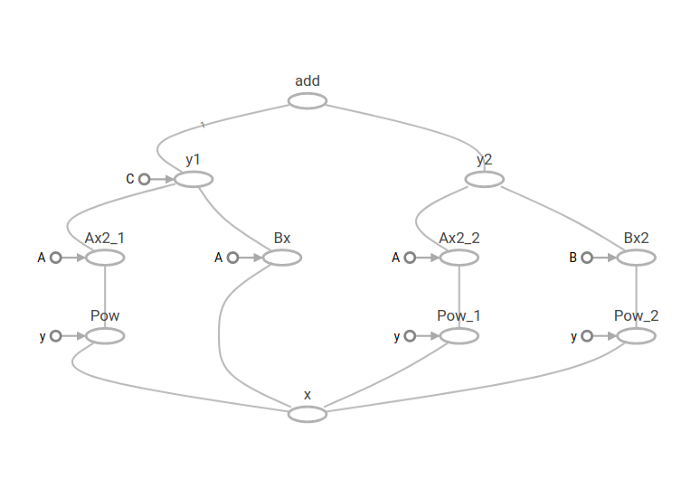

In [139]:
with tf.Session() as sess:
    print(sess.run(y,feed_dict ={x:[10]}))
writer = tf.summary.FileWriter('./named_scope',sess.graph)
writer.close()
img_1

We use namedscope so that we wrap up units and makes the graph looks better. And there's less mess and instead there's proper arrangement and management:

The above graph looks complicated , here we use namedscope to make it look much better

**Rewriting the Above code for better graphical structure and less complexity**

[1244]
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
tf.float32 has type DType, but expected one of: int, long, bool
Type is unsupported, or the types of the items don't match field type in CollectionDef. Note this is a warning and probably safe to ignore.
tf.float32 has type DType, but expected one of: int, long, bool


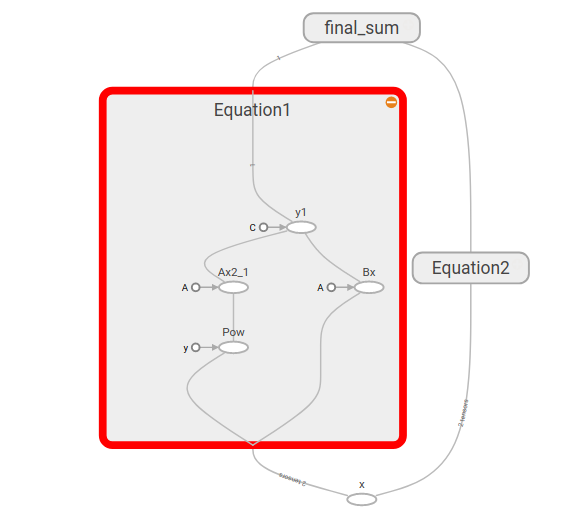

In [140]:
A = tf.constant([4],tf.int32,name='A')
B = tf.constant([4],tf.int32,name='B')
C = tf.constant([4],tf.int32,name='C')

x = tf.placeholder(tf.int32,name='x')

# y = Ax^2 + Bx + C
with tf.name_scope("Equation1"):
    
    Ax2_1 = tf.multiply(A,tf.pow(x,2),name='Ax2_1')
    Bx = tf.multiply(A,x,name='Bx')
    y1 = tf.add_n([Ax2_1,Bx,C],name='y1')

# y2 = Ax^2 + Bx^2
with tf.name_scope("Equation2"):
    Ax2_2 = tf.multiply(A,tf.pow(x,2),name='Ax2_2')
    Bx2 = tf.multiply(B,tf.pow(x,2),name='Bx2')
    y2 = tf.add_n([Ax2_2,Bx2],name='y2')
with tf.name_scope("final_sum"):
    y = y1 + y2
    
with tf.Session() as sess:
    print(sess.run(y,feed_dict={x:[10]}))
writer = tf.summary.FileWriter('./named_scope',sess.graph)
writer.close()
img_2